Autor: Anna Dědová

### Import vlastních funkcí

In [1]:
# import z GitHub repository
!git clone https://github.com/anciksfg/Semestralka-ZSUR
%cd Semestralka-ZSUR
!ls

%load_ext autoreload
%autoreload 2 # reload modulů při každém spuštění (aby nepracoval se starými moduly z cache)

Cloning into 'Semestralka-ZSUR'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 87 (delta 40), reused 70 (delta 23), pack-reused 0
Unpacking objects: 100% (87/87), done.
/content/Semestralka-ZSUR
bayes.py		    metoda_maximin.py
binarni_deleni.py	    __pycache__
ceny_trid.txt		    retezova_mapa.py
data2.txt		    rosenblattova_metoda.py
data.txt		    shlukova_metoda.py
iterativni_optimalizace.py  stredy.txt
kmeans.py		    upravena_metoda_konst_prirustku.py
kNN.py			    vektorova_kvantizace.py
labels.txt		    Y.txt
metoda_konst_prirustku.py   zadani.pdf


In [2]:
# import modulů
import matplotlib.pyplot as plt
import numpy as np
import time

# import vlastních funkcí k úlohám
import shlukova_metoda as sm
import retezova_mapa as rm
import metoda_maximin as mm
import kmeans as km
import binarni_deleni as bd
import iterativni_optimalizace as iopt
import vektorova_kvantizace as vk
import bayes as bs
import kNN
import rosenblattova_metoda as rsm
import metoda_konst_prirustku as mkp
import upravena_metoda_konst_prirustku as umkp

### Načtení a zobrazení dat

[[ 1.100177  -3.067481 ]
 [ 0.6889062 -2.785743 ]
 [ 0.2491251 -3.105102 ]
 ...
 [-7.060973   3.271524 ]
 [-1.695408  -3.114714 ]
 [ 0.7562193 -2.917731 ]]
(6338, 2)


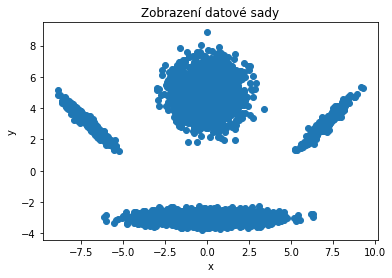

In [3]:
  # Načtení dat
  X = sm.load('data.txt')
  print(X)
  print(X.shape)

  # Zobrazení dat
  plt.scatter(X[:, 0], X[:, 1])
  plt.title("Zobrazení datové sady")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.show()

# Automaticky určit počet tříd

## Metodou **shlukové hladiny** (automaticky nalezněte hladinu h)  

Čas běhu:  9.678184032440186 s
Počet tříd:  4


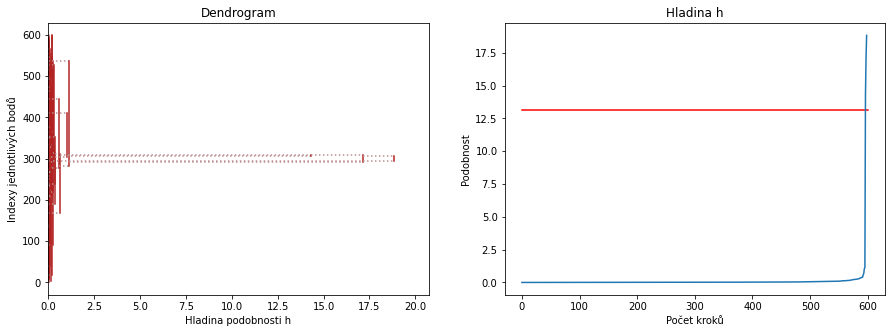

In [4]:
# Náhodný výběr části dat
indexes = np.random.choice(X.shape[0], replace=False, size=600)
Vyber = X[indexes, :].copy()

# Použití metody shlukové hladiny na zmenšeném výběru
# metrika podobnosti: Kvadrát eukleidovské vzdálenosti
start = time.time()
h, _ = sm.shlukova_hladina(Vyber)
print('Čas běhu: ', time.time() - start, 's')

# Automatické nalezení idealního počtu tříd
pocet_trid, h_diff = sm.najdi_h_diff(h)
print('Počet tříd: ', pocet_trid)

sm.zobraz_hladinu_podobnosti(h, h_diff, pocet_trid)

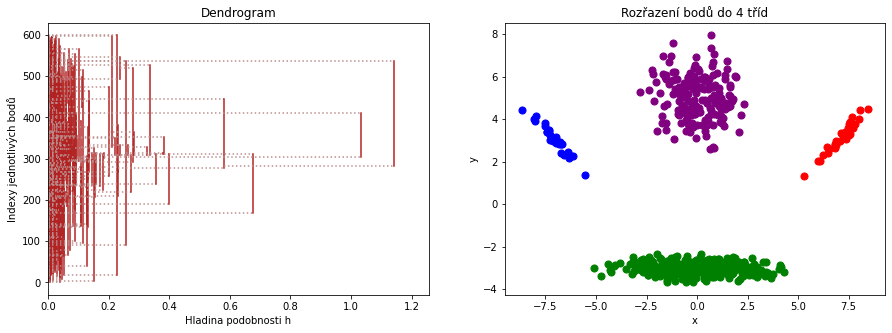

In [5]:
# Rozřazení bodů do určeného počtu tříd
h, labels = sm.shlukova_hladina(Vyber, pocet_shluku=pocet_trid)
sm.zobraz_rozdelene_body(Vyber, labels, pocet_trid)

## Metodou **rětězové mapy** (zkuste několik různých počátků)

Čas běhu: 0.35802483558654785 s
Počet tříd: 4


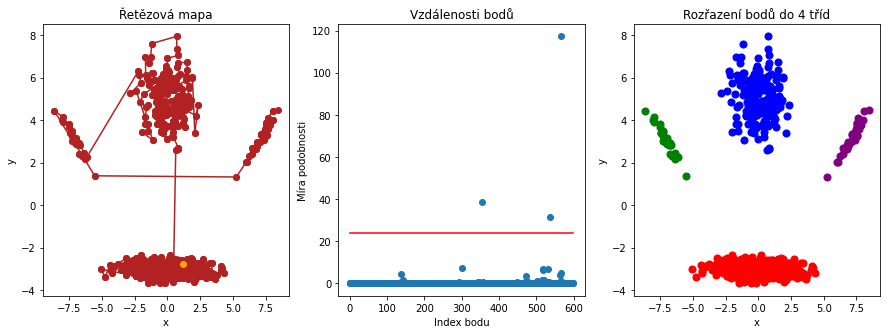

Čas běhu: 0.34766650199890137 s
Počet tříd: 3


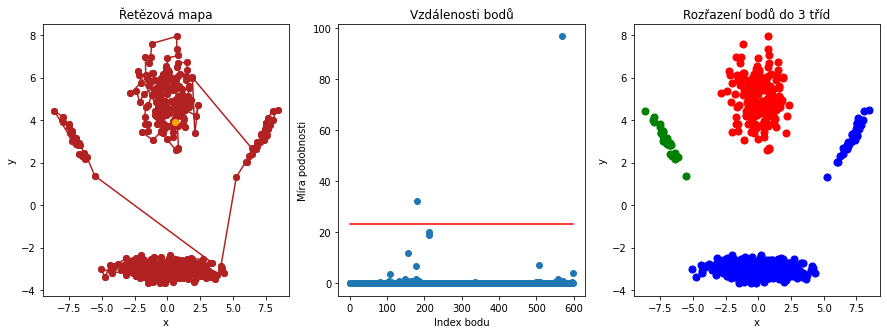

Čas běhu: 0.35292792320251465 s
Počet tříd: 4


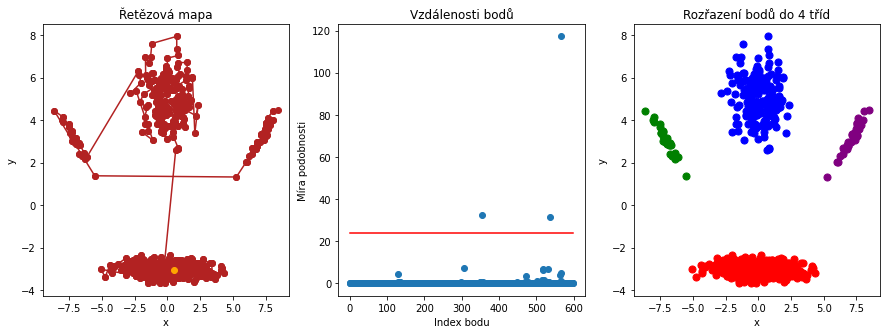

In [6]:
for i in range(3):  # 3x spustit metodu retězové mapy
  start = time.time()
  posl, d = rm.retezova_mapa(Vyber)  # Výběr části dat stejný jako v předchozí úloze
  print("Čas běhu:", time.time() - start, 's')

  # Určení hranice pro rozdělení tříd
  threshold = np.median(d) * len(d) * 2.5  # pri prekroceni nova trida

  # Zjištění tříd a zobrazení grafů
  pocet_trid, labels = rm.urci_tridy(d, posl, threshold)
  print('Počet tříd:', pocet_trid)
  rm.zobraz_mapu(posl)
  rm.zobraz_vzdalenosti(d, threshold)
  rm.zobraz_rozdelene_body(posl, labels, pocet_trid)

## Metodou **MAXIMIN**

Čas běhu: 0.1754453182220459 s
Počet tříd: 4


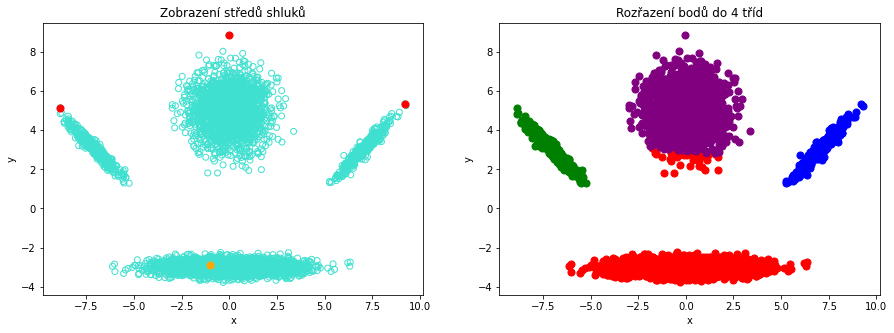

Čas běhu: 0.25052809715270996 s
Počet tříd: 5


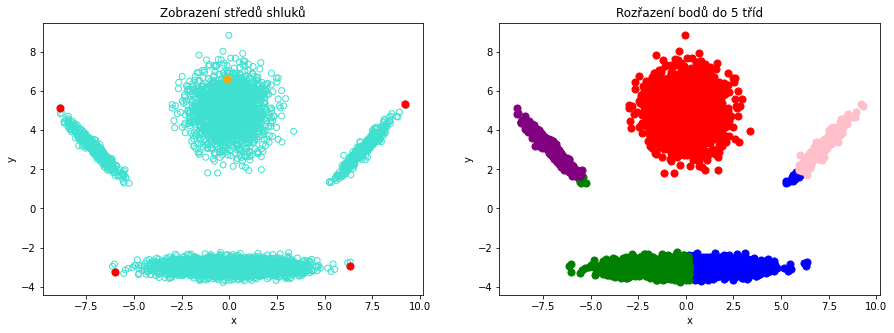

Čas běhu: 0.19039463996887207 s
Počet tříd: 4


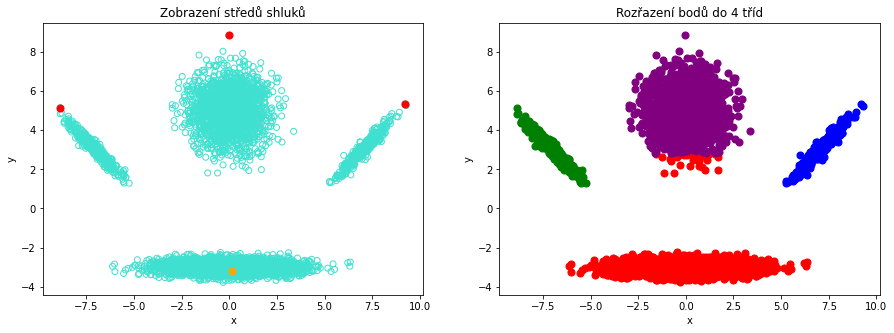

In [7]:
# Určení středů shluků metodou maximin
for i in range(3): # 3x spustit
  start = time.time()
  stredy = mm.maximin(X, q=0.5)
  print("Čas běhu:", time.time() - start, 's')
  print("Počet tříd:", len(stredy))

  labels = mm.rozrad_body(X, stredy)
  mm.zobraz_stredy(X, stredy)
  mm.zobraz_rozdelene_body(X, labels, len(stredy))

### Vzájemné porovnání metod

Metodou **shlukové hladiny** je možné spolehlivě určit počet tříd, ale její výpočetní složitost je poměrně nepříznivá. Z důvodu časové náročnosti pracovala jen s částí dat, ale i na tato menší část stačila k určení počtu tříd. 

U metody **řetězové mapy** stačil řádově kratší čas pro výpočet, ale u počtu tříd se často vyskytuje několik bodů odděleně, pokud vyšly na řadu až jako poslední. Graficky je ale možné odhad tříd podle těchto anomálií upravit. Zvolení vhodného parametru pro rozlišení tříd není triviální. 


Metoda **maximin** byla nejrychlejší a počet tříd určovala o něco splehlivěji než metoda řětězové mapy. Díky výpočtu vzdáleností pouze k několika středům probíhá výpočet poměrně rychle. Zvolení parametru pro rozlišení je také jednodušší než v předchozí metodě. Klasifikace bodů je pomocí této metody poměrně nespolehlivá v závislosti na tom, kde se nachází středy a jak jsou rozmístěna data. 



# Rozdělit všechna data do zjištěného počtu tříd


## Metodou k-means

Čas běhu: 0.696697473526001 s
Cena:  15933.191075187175


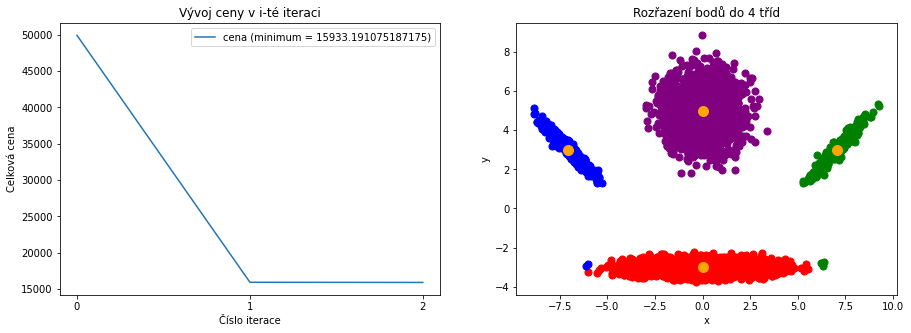

Čas běhu: 2.1882894039154053 s
Cena:  26055.119409303737


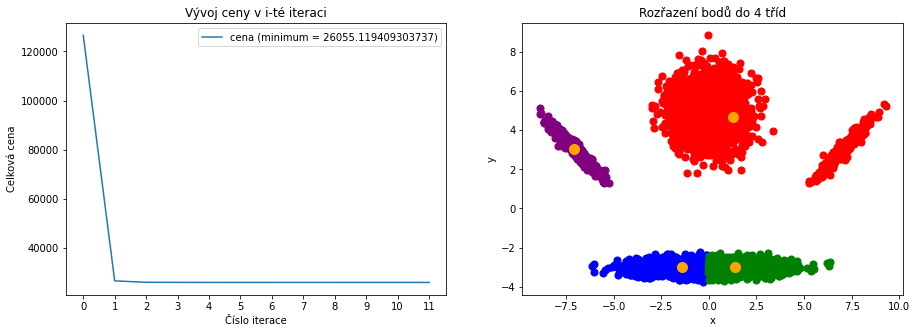

Čas běhu: 0.8699619770050049 s
Cena:  15933.191075187173


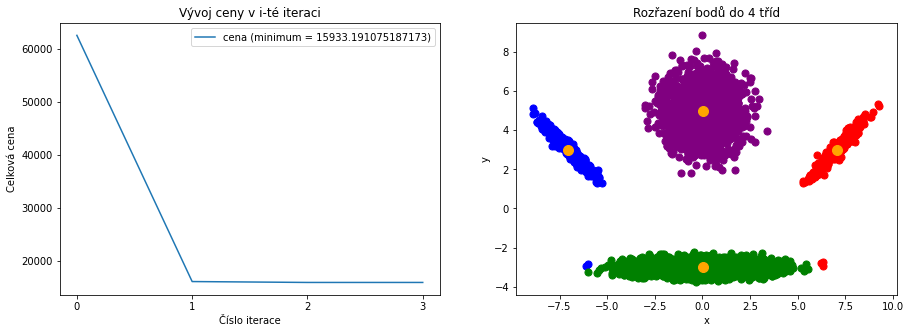

In [8]:
# Určení nejlepší varianty rozdělení ze 3 pokusů
glob_J = []
glob_stredy = []
glob_labels = []

for i in range(3):
  # Určení středů a rozdělení metodou k-means
  start = time.time()
  stredy, labels, J, _ = km.kmeans(X, pocet_trid=4)
  print("Čas běhu:", time.time() - start, 's')
  print("Cena: ", J[-1])

  glob_J.append(J[-1])
  glob_stredy.append(stredy)
  glob_labels.append(labels)

  km.zobraz_vyvoj_ceny(J)
  km.zobraz_rozdelene_body(X, labels, stredy)

Rozhodnutí o nejlepším rozdělení

In [9]:
nejlepsi = np.argmin(glob_J)
cena = glob_J[nejlepsi]
stredy = glob_stredy[nejlepsi]
labels = glob_labels[nejlepsi]
print("Nejlepší je rozdělení", nejlepsi + 1, "s cenou", cena)

Nejlepší je rozdělení 3 s cenou 15933.191075187173


## Porovnat rovnoměrné binární dělení s nerovnoměrným


Rovnoměrné binární dělení
Čas běhu: 2.091334819793701 s
Cena:  24654.955874798994

Nerovnoměrné binární dělení
Čas běhu: 1.061811923980713 s
Cena:  15949.42611548196


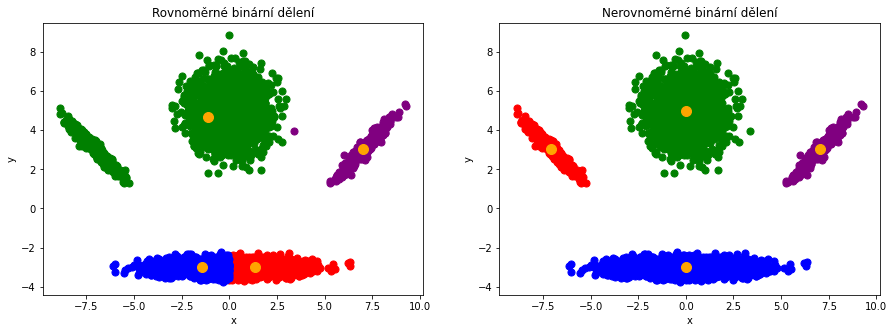

In [10]:
# Rozdělení metodou rovnomerneho binarniho deleni
start = time.time()
Y, labels, stredy, J, ceny_trid = bd.rovnomerne_binarni_deleni(X, pocet_trid=4)
print('Rovnoměrné binární dělení')
print("Čas běhu:", time.time() - start, 's')
print("Cena: ", J)
bd.zobraz_rozdelene_body(Y, labels, stredy, cislo_grafu=1)

# Rozdělení metodou nerovnoměrného binarniho deleni
start = time.time()
Y, labels, stredy, J, ceny_trid = bd.nerovnomerne_binarni_deleni(X, pocet_trid=4)
print("\nNerovnoměrné binární dělení")
print("Čas běhu:", time.time() - start, 's')
print("Cena: ", J)
bd.zobraz_rozdelene_body(Y, labels, stredy, cislo_grafu=2)

# Iterativní optimalizace
Optimalizace výsledného rozdělení z bodu 2.

Cena před optimalizací: 15949.42611548196
Cena po optimalizaci: 15933.191075187175


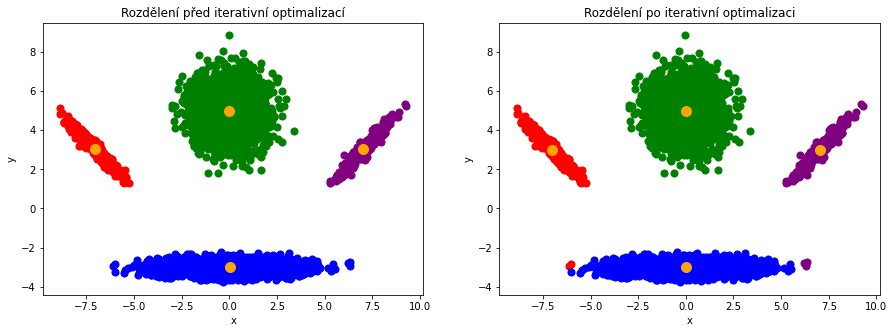

In [11]:
# Zobrazení původního rozdělení pro porovnání s výsledným
print("Cena před optimalizací:", np.sum(ceny_trid))
iopt.zobraz_rozdelene_body(Y, labels, stredy, cislo_grafu=1)

# Provedení iterativní optimalizace
Y2, labels2, ceny_trid2, cetnosti2, stredy2 = iopt.iter_opt(Y, labels, ceny_trid, stredy)

# Zobrazení výsledků
print("Cena po optimalizaci:", np.sum(ceny_trid))
iopt.zobraz_rozdelene_body(Y2, labels2, stredy2, cislo_grafu=2)

Iterativní optimalizace sice nalezla rozdělení s lepší cenou, ale výsledné rozdělení bude mít více špatně klasifikovaných bodů.

# Na základě informací od učitele (z bodu 2) natrénovat klasifikátory
Všechna data od učitele vychází z druhé části - nutno spustit před částí 4

## Bayesův klasifikátor
Bez explicitního řešení hranice (kuželosečky), stačí odhadnout parametry jednosložkového normálního rozložení a dostatečně jemným rastrem ohodnotit body v prostoru (kam má který bod nejvyšší pravděpodobnost).

Čas běhu: 0.0038111209869384766 s


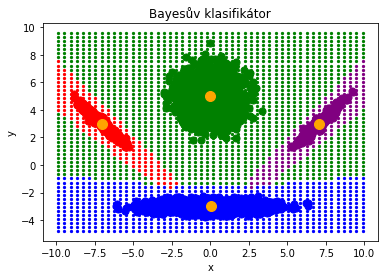

In [12]:
start = time.time()
# paramtery rozlozeni trid a jejich apriorni ppsti p(c)
means, stds, pc = bs.bayes(Y, labels)
print("Čas běhu:", time.time() - start, 's')

# Vytvoření rastru, klasifikace jeho bodů a zobrazení
bs.vytvor_grid_klasifikuj_zobraz(Y, labels, stredy, means, stds, pc)

## Vektorová kvantizace
Velikost kódové knihy rovna počtu zjištěných tříd. Zakreslení vzorů pomocí rastru.




Čas běhu: 1.1042425632476807 s


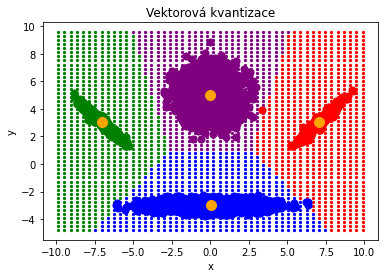

In [13]:
#Vektorová kvantizace, hledá kódovou knihu pomocí nerovnoměřného binárního dělení
start = time.time()
kodova_kniha, grid, grid_labels, Y, labels = vk.vektorova_kvantizace(X, pocet_trid=4)
print("Čas běhu:", time.time() - start, 's')

vk.zobraz_kvantizaci(kodova_kniha, grid, grid_labels, Y, labels)

## Klasifikátor podle nejbližšího souseda
Vyzkoušení klasifikace podle jednoho a podle dvou nejbližších sousedů. Zakreslení pomocí rastru.

Čas běhu podle 1-nejbližšího souseda: 60.413626194000244


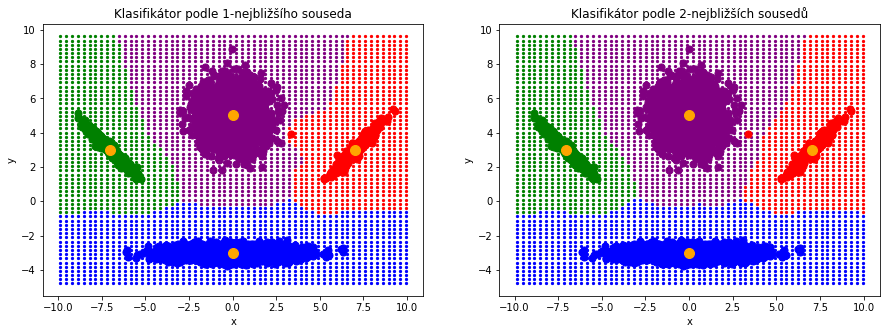

Čas běhu podle 2-nejbližších sousedů: 60.858869552612305


In [14]:
start = time.time()
# Klasifikace podle jednoho nejbližšího souseda
kNN.vytvor_grid_klasifikuj_zobraz(Y, labels, stredy, k=1)
print('Čas běhu podle 1-nejbližšího souseda:', time.time() - start)

start = time.time()
# Klasifikace podle jednoho nejbližšího souseda
kNN.vytvor_grid_klasifikuj_zobraz(Y, labels, stredy, k=2)
print('Čas běhu podle 2-nejbližších sousedů:', time.time() - start)

## Klasifikátor s lineárními diskriminačními funkcemi
Porovnání potřebného počtu iterací při použití **Rosenblattova** **algoritmu**, **metody konstantních přírůstků** a **upravené metody konstantních přírůstků** pro několik zvolených konstant učení. Zakreslení pomocí rastru.

### Rossenblattův algoritmus

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


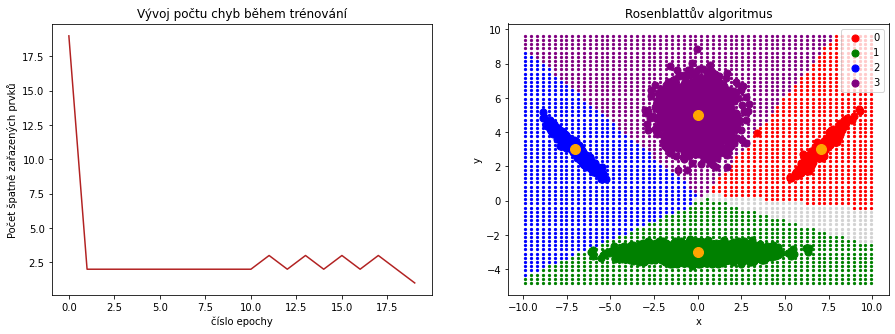

In [15]:
Y, labels = rsm.prehazet(Y, labels, pocet_prvku=len(Y))
Y_normalized, norm_mean = rsm.normalize(Y)

# Trénování diksriminačních funkcí rosenblattovou metodou
diskr_fce, vyvoje_cen = rsm.train_multiple_fcns(Y_normalized, labels, num_epochs=20)

# Vytvoření rastru, klasifikace jeho bodů a zobrazení
rsm.vytvor_grid_klasifikuj_zobraz(Y, labels, norm_mean, stredy, diskr_fce, vyvoje_cen)

### Metoda konstantních přírůstků

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


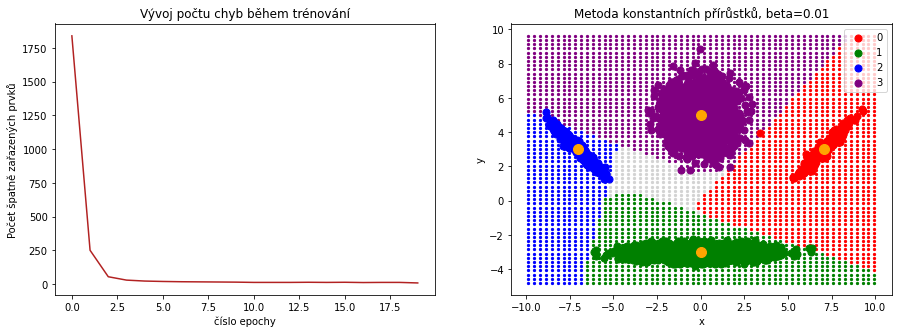

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


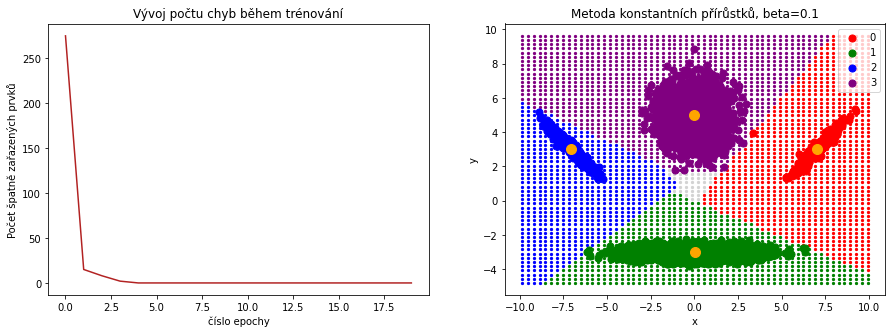

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


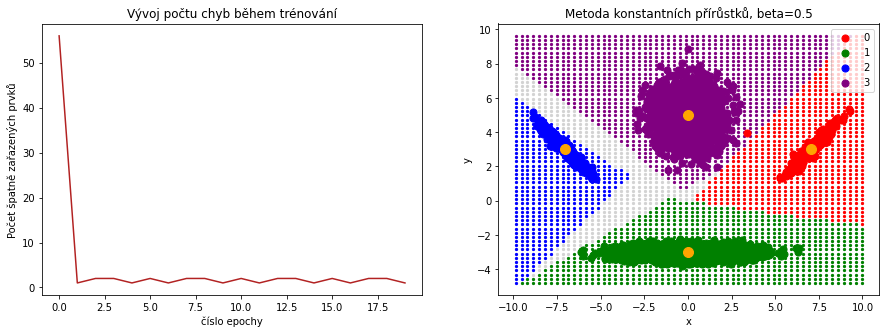

In [16]:
Y, labels = mkp.prehazet(Y, labels, pocet_prvku=len(Y))
Y_normalized, norm_mean = mkp.normalize(Y)

for beta in [0.01, 0.1, 0.5]:
  # Trénování diksriminačních funkcí metodou konstantních přírůstků
  diskr_fce, vyvoje_cen = mkp.train_multiple_fcns(Y_normalized, labels, num_epochs=20, beta=beta)

  # Vytvoření rastru, klasifikace jeho bodů a zobrazení
  mkp.vytvor_grid_klasifikuj_zobraz(Y, labels, norm_mean, stredy, diskr_fce, vyvoje_cen, beta=beta)

### Upravená metoda konstantních přírůstků

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


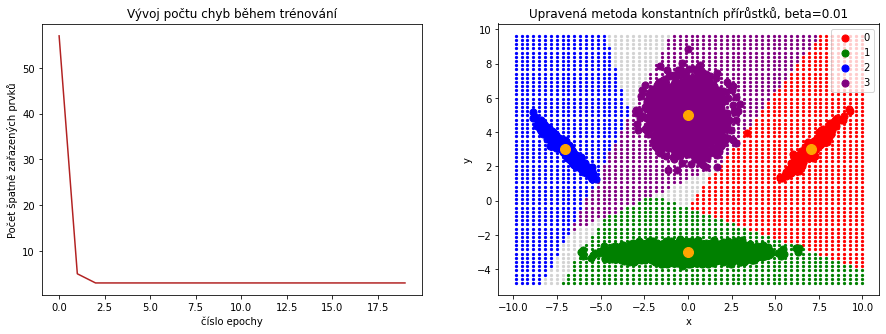

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


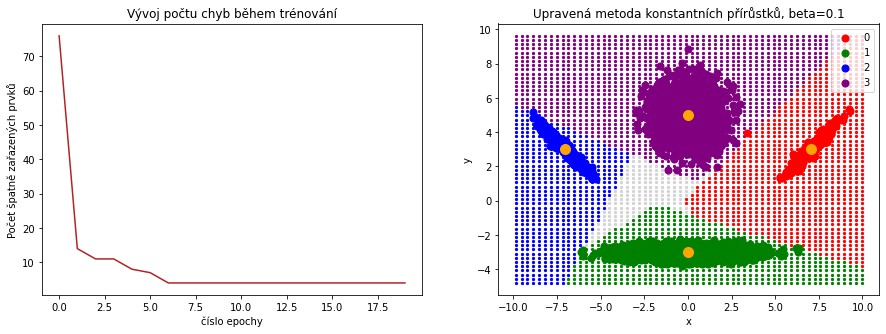

Training multiple diskr functions...
Training weight vector 0 1 ...
Training weight vector 0 2 ...
Training weight vector 0 3 ...
Training weight vector 1 2 ...
Training weight vector 1 3 ...
Training weight vector 2 3 ...


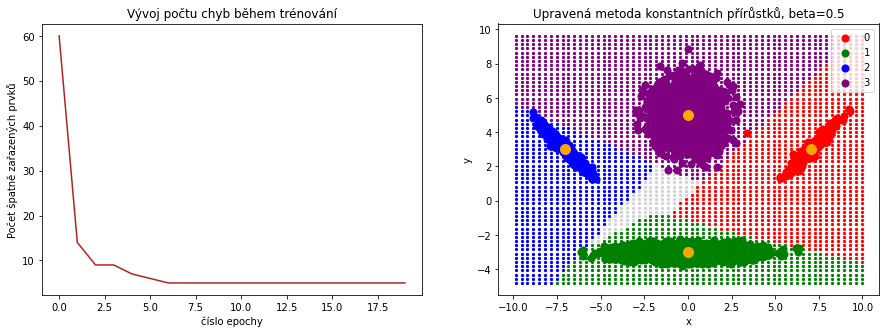

In [17]:
Y, labels = umkp.prehazet(Y, labels, pocet_prvku=len(Y))
Y_normalized, norm_mean = umkp.normalize(Y)

for beta in [0.01, 0.1, 0.5]:
  # Trénování diksriminačních funkcí upravenou metodou konstantních přírůstků
  diskr_fce, vyvoje_cen = umkp.train_multiple_fcns(Y_normalized, labels, num_epochs=20, beta=beta)

  # Vytvoření rastru, klasifikace jeho bodů a zobrazení
  umkp.vytvor_grid_klasifikuj_zobraz(Y, labels, norm_mean, stredy, diskr_fce, vyvoje_cen, beta=beta)

Šedě označené body není možné klasifikovat, buď z důvodu, že žádná diskriminační funkce je neurčila jako náležící do její třídy, nebo byly řazeny do několika tříd zároveň. 